<a href="https://colab.research.google.com/github/Saputoa21/Applied_ML_Spoiler_Detection_Group_Project_2025/blob/main/Applied_ML_Movie_Spoiler_Detection_Group_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applied ML - Movie Spoiler Detection**

## Group 5: Arina Antonova, Anastasiya Saputo, Juliana Schöner, Milica Djordjevic

### Project Description
The project ...


### Workflow

1.   Loading the Dataset
2.   Analysing the Dataset
3.   Classical ML
  1.   Decision Tree    
  2.   Random Forest
  3.   Naive Bayes
4.   NLMs
  1.   Fine-tuning general pre-trained model
  2.   Fine-tuning fine-tuned model on spoiler detection
5. Comparison

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Loading Datasets**

Misra, Rishabh. "IMDB Spoiler Dataset." DOI: 10.13140/RG.2.2.11584.15362 (2019).

The files should be uploaded left in the "files" directory

In [1]:
import pandas as pd
import zipfile
import os
from google.colab import files

### Dataset with plot summaries

In [3]:
import json

file_path1 = '/content/IMDB_movie_details.json'
with open(file_path1, 'r', encoding='utf-8') as f:
    for i in range(5):
        print(f.readline())

{"movie_id": "tt0105112", "plot_summary": "Former CIA analyst, Jack Ryan is in England with his family on vacation when he suddenly witnesses an explosion outside Buckingham Palace. It is revealed that some people are trying to abduct a member of the Royal Family but Jack intervenes, killing one of them and capturing the other, and stops the plan in its tracks. Afterwards, he learns that they're Irish revolutionaries and the two men are brothers. During his court hearing the one that's still alive vows to get back at Jack but is sentenced and that seems to be the end of it. However, whilst the man is being transported, he is broken out. Jack learns of this but doesn't think there's anything to worry about. But, when he is at the Naval Academy someone tries to kill him. He learns that they are also going after his family and so he rushes to find them, safe but having also been the victims of a failed assassination. That's when Jack decides to rejoin the CIA, and they try to find the man

In [4]:
df_plot_summaries = pd.read_json(file_path1, lines=True)

In [5]:
df_plot_summaries.tail()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
1567,tt0289879,Evan Treborn grows up in a small town with his...,1h 53min,"[Sci-Fi, Thriller]",7.7,2004-01-23,"In the year 1998, Evan Treborn (Ashton Kutcher..."
1568,tt1723811,Brandon is a 30-something man living in New Yo...,1h 41min,[Drama],7.2,2012-01-13,"Brandon (Michael Fassbender) is a successful, ..."
1569,tt5013056,Evacuation of Allied soldiers from the British...,1h 46min,"[Action, Drama, History]",8.1,2017-07-21,The film alternates between three different pe...
1570,tt0104014/,"For a while now, beautiful 24-year-old Diana B...",1h 33min,"[Comedy, Drama]",5.3,1992-02-21,
1571,tt0114142/,"The marriage of David Burgess, a senior execut...",1h 32min,"[Drama, Thriller]",4.0,1999-01-29,


In [6]:
df_plot_summaries['plot_summary'][0]

"Former CIA analyst, Jack Ryan is in England with his family on vacation when he suddenly witnesses an explosion outside Buckingham Palace. It is revealed that some people are trying to abduct a member of the Royal Family but Jack intervenes, killing one of them and capturing the other, and stops the plan in its tracks. Afterwards, he learns that they're Irish revolutionaries and the two men are brothers. During his court hearing the one that's still alive vows to get back at Jack but is sentenced and that seems to be the end of it. However, whilst the man is being transported, he is broken out. Jack learns of this but doesn't think there's anything to worry about. But, when he is at the Naval Academy someone tries to kill him. He learns that they are also going after his family and so he rushes to find them, safe but having also been the victims of a failed assassination. That's when Jack decides to rejoin the CIA, and they try to find the man before he makes another attempt.         

### Dataset with spoilers

In [7]:
file_path2 = '/content/IMDB_reviews.json'
with open(file_path2, "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())

{"review_date": "10 February 2006", "movie_id": "tt0111161", "user_id": "ur1898687", "is_spoiler": true, "review_text": "In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction were \"just happy to be nominated.\" Of course hindsight is 20/20, but while history looks back on Gump as a good film, Pulp and Redemption are remembered as some of the all-time best. Pulp, however, was a success from the word \"go,\" making a huge splash at Cannes and making its writer-director an American master after only two films. For Andy Dufresne and Co., success didn't come easy. Fortunately, failure wasn't a life sentence.After opening on 33 screens with take of $727,327, the $25M film fell fast from theatres and finished with a mere $28.3M. The reasons for failure ar

Apparently. json file is invalid in some lines, so we need to clean the data

In [8]:
import json

fixed_lines = []
with open(file_path2, "r", encoding="utf-8") as f:
    for line in f:
        try:
            fixed_lines.append(json.loads(line.strip()))  # Parse each line safely
        except json.JSONDecodeError:
            print("Skipping bad line:", line)

Skipping bad line: {"review_date": "22 September 2013", "movie_id": "tt0167260", "user_id": "ur46482417", "is_spoiler": false, "review_text": "Despite all the hype I never liked The Lord of the Rings, in fact, I thought they were stupid. However, one day I decided to give it a try, and I watched Fellowship of the Ring-one of the greatest movie's I've ever seen. The next day I watched Two Towers and loved it more than Fellow


In [9]:
df_spoilers = pd.DataFrame(fixed_lines)

In [10]:
df_spoilers.tail()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
18236,9 October 2013,tt0167260,ur19558861,False,Having re-watched this on the sofa just the ot...,9,Immensely good conclusion
18237,2 October 2013,tt0167260,ur23473368,False,I am a nerd when it comes to Lord of the Rings...,10,The Grand Finale
18238,2 October 2013,tt0167260,ur47046429,False,Amazing!!! That sums it up. I gave it a nine c...,9,The last part to the LOTR
18239,2 October 2013,tt0167260,ur40048612,False,the best movie i've seen. The final battle for...,10,the lord of the rings
18240,29 September 2013,tt0167260,ur46981426,False,I think they did a good job with the last movi...,10,Great finish to a great trilogy!


In [11]:
df_spoilers['review_text'][0]

'In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction were "just happy to be nominated." Of course hindsight is 20/20, but while history looks back on Gump as a good film, Pulp and Redemption are remembered as some of the all-time best. Pulp, however, was a success from the word "go," making a huge splash at Cannes and making its writer-director an American master after only two films. For Andy Dufresne and Co., success didn\'t come easy. Fortunately, failure wasn\'t a life sentence.After opening on 33 screens with take of $727,327, the $25M film fell fast from theatres and finished with a mere $28.3M. The reasons for failure are many. Firstly, the title is a clunker. While iconic to fans today, in 1994, people knew not and cared not what a \'Shaws

### Creating one common dataset

In [12]:
combined_df = pd.merge(df_spoilers, df_plot_summaries, on='movie_id')

combined_df.tail()

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis
18236,9 October 2013,tt0167260,ur19558861,False,Having re-watched this on the sofa just the ot...,9,Immensely good conclusion,The final confrontation between the forces of ...,3h 21min,"[Adventure, Drama, Fantasy]",8.9,2003-12-17,"In the opening scene, a flashback, two hobbits..."
18237,2 October 2013,tt0167260,ur23473368,False,I am a nerd when it comes to Lord of the Rings...,10,The Grand Finale,The final confrontation between the forces of ...,3h 21min,"[Adventure, Drama, Fantasy]",8.9,2003-12-17,"In the opening scene, a flashback, two hobbits..."
18238,2 October 2013,tt0167260,ur47046429,False,Amazing!!! That sums it up. I gave it a nine c...,9,The last part to the LOTR,The final confrontation between the forces of ...,3h 21min,"[Adventure, Drama, Fantasy]",8.9,2003-12-17,"In the opening scene, a flashback, two hobbits..."
18239,2 October 2013,tt0167260,ur40048612,False,the best movie i've seen. The final battle for...,10,the lord of the rings,The final confrontation between the forces of ...,3h 21min,"[Adventure, Drama, Fantasy]",8.9,2003-12-17,"In the opening scene, a flashback, two hobbits..."
18240,29 September 2013,tt0167260,ur46981426,False,I think they did a good job with the last movi...,10,Great finish to a great trilogy!,The final confrontation between the forces of ...,3h 21min,"[Adventure, Drama, Fantasy]",8.9,2003-12-17,"In the opening scene, a flashback, two hobbits..."


## **2. Analysing Dataset**

### Problem of genres in the dataset

In [14]:
genre_df = combined_df['genre']

genre_df

,genre
0,"[Crime, Drama]"
1,"[Crime, Drama]"
2,"[Crime, Drama]"
3,"[Crime, Drama]"
4,"[Crime, Drama]"
...,...
18236,"[Adventure, Drama, Fantasy]"
18237,"[Adventure, Drama, Fantasy]"
18238,"[Adventure, Drama, Fantasy]"
18239,"[Adventure, Drama, Fantasy]"


In [15]:
all_genres = set()

for genres in genre_df:
    if isinstance(genres, list):
        # Add the whole combined genre list as a single entry
        all_genres.add(str(genres)) # Convert the list to a string

        # Add individual genres from the list
        for genre in genres:
            all_genres.add(genre)
    else:
        all_genres.add(genres)

print(all_genres)
print(len(all_genres))

{'Action', "['Crime', 'Drama']", 'Biography', "['Action', 'Crime', 'Drama']", 'Drama', 'Crime', "['Adventure', 'Drama', 'Fantasy']", "['Biography', 'Drama', 'History']", 'History', 'Adventure', 'Fantasy'}
11


In [16]:
combined_df_exploded = combined_df.explode('genre') #converting list values of genres into rows, but only one will be stored if there are several!

genre_df_exploded = combined_df_exploded['genre']

genre_df_exploded

,genre
0,Crime
0,Drama
1,Crime
1,Drama
2,Crime
...,...
18239,Drama
18239,Fantasy
18240,Adventure
18240,Drama


In [17]:
combined_df_exploded = combined_df.explode('genre') #converting list values of genres into rows, but only one will be stored if there are several!

genre_df_exploded = combined_df_exploded['genre']

genre_set = set()
for genre in genre_df_exploded:
  genre_set.add(genre)

print(genre_set)
print(len(genre_set))

{'Action', 'Biography', 'Drama', 'Crime', 'History', 'Adventure', 'Fantasy'}
7


### Percentage of spoilers in the dataset

In [18]:
import matplotlib.pyplot as plt

is_spoiler
False    13846
True      4395
dtype: int64


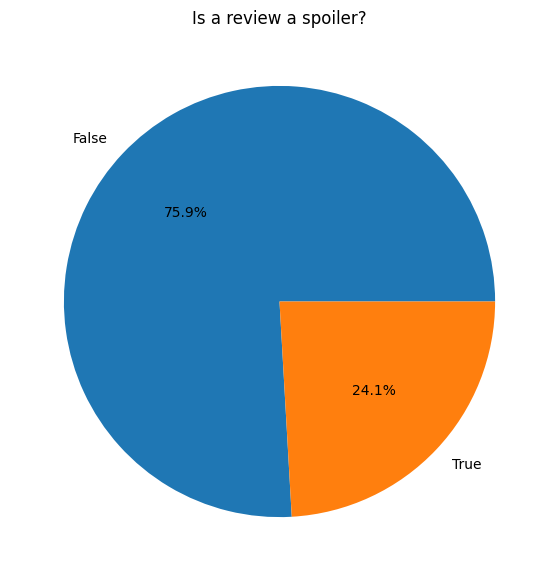

In [19]:
# number of spoilers in a original combined dataset

is_spoiler_df = combined_df.groupby("is_spoiler").size()
print(is_spoiler_df)

is_spoiler_df.plot.pie(y=is_spoiler_df.values, labels=is_spoiler_df.index, autopct='%1.1f%%', figsize=(7,7))

plt.title("Is a review a spoiler?")
plt.show()

is_spoiler
False    33743
True     11010
dtype: int64


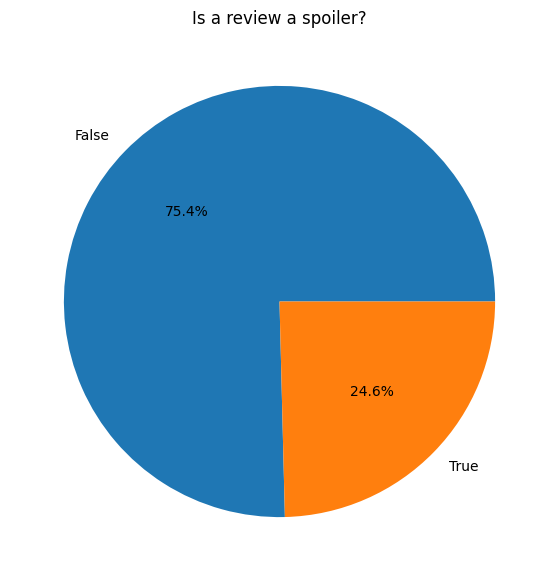

In [20]:
#number of spoilers in a dataset where each genre appears once
is_spoiler_df = combined_df_exploded.groupby("is_spoiler").size()
print(is_spoiler_df)

is_spoiler_df.plot.pie(y=is_spoiler_df.values, labels=is_spoiler_df.index, autopct='%1.1f%%', figsize=(7,7))

plt.title("Is a review a spoiler?")
plt.show()

### Number and percentage of spoilers per genre in the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_df_exploded = combined_df.explode('genre')

combined_df_exploded['is_spoiler'] = combined_df_exploded['is_spoiler'].astype(bool)

# We divide the genres if there is a list of them
combined_df_exploded = combined_df_exploded.explode('genre')

# Group by genre and count the number of spoilers for each
genre_spoiler_counts = combined_df_exploded.groupby('genre')['is_spoiler'].sum()
genre_counts = combined_df_exploded['genre'].value_counts()

genre_stats = pd.DataFrame({
    'spoilers_count': genre_spoiler_counts,
    'total_count': genre_counts
})

genre_stats['spoiler_percentage'] = (genre_stats['spoilers_count'] / genre_stats['total_count']) * 100

genre_stats = genre_stats.sort_values(by='spoiler_percentage', ascending=False)

print("Individual Genre Stats:")
print(genre_stats)

Individual Genre Stats:
           spoilers_count  total_count  spoiler_percentage
genre                                                     
Thriller              532         1532           34.725849
Mystery               415         1264           32.832278
Sci-Fi                448         1381           32.440261
Horror                133          411           32.360097
Action               1986         6977           28.464956
Crime                4641        18333           25.315006
Music                  98          396           24.747475
Family                254         1046           24.282983
Drama                7168        30238           23.705272
Romance               236         1037           22.757956
Biography             530         2341           22.639897
Comedy                311         1386           22.438672
History               248         1145           21.659389
Adventure            1446         6789           21.299160
War                   268       

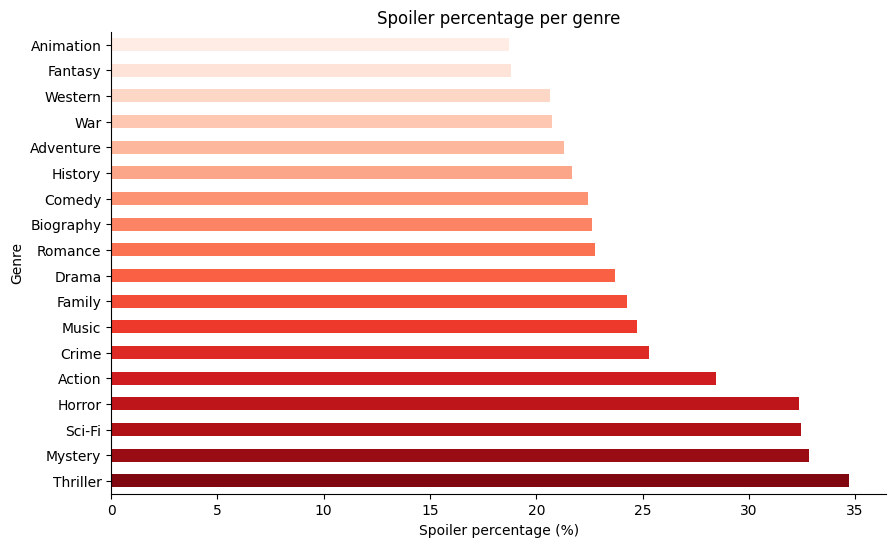

In [ ]:
plt.figure(figsize=(10, 6))
genre_stats['spoiler_percentage'].plot(kind='barh', color=sns.color_palette('Reds_r', len(genre_stats)))

plt.xlabel("Spoiler percentage (%)")
plt.ylabel("Genre")
plt.title("Spoiler percentage per genre")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

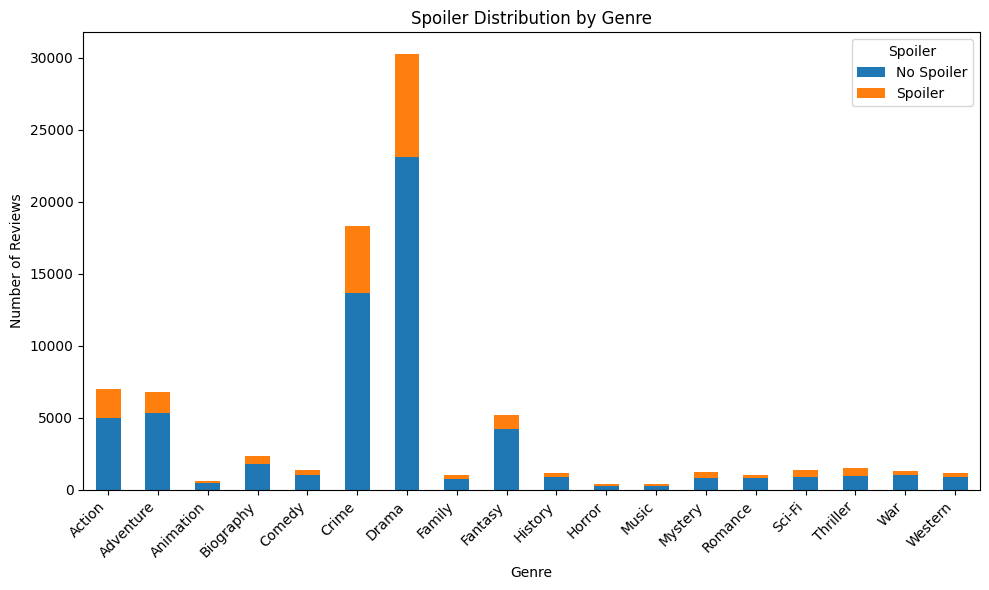

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming your DataFrame is named 'df' with columns 'genre' and 'spoiler'
# and 'spoiler' is a boolean column (True/False)

def plot_stacked_histograms(df, genre_col = 'genre', spoiler_col = 'spoiler'):
    """
    Creates stacked histograms of spoiler distribution by genre.

    Args:
        df (pd.DataFrame): DataFrame with genre and spoiler information.
        genre_col (str): Name of the genre column.
        spoiler_col (str): Name of the spoiler column (boolean).
    """

    # Check if the required columns exist
    if genre_col not in df.columns or spoiler_col not in df.columns:
        print(f"Error: Columns '{genre_col}' or '{spoiler_col}' not found in DataFrame.")
        return

    # Group by genre and spoiler, and count the occurrences
    grouped = df.groupby([genre_col, spoiler_col]).size().unstack(fill_value=0)

    # Plot the stacked histograms
    grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Spoiler Distribution by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend(title='Spoiler', labels=['No Spoiler', 'Spoiler']) # Add legend

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

reviews_df = pd.DataFrame(combined_df_exploded)

plot_stacked_histograms(reviews_df, genre_col='genre', spoiler_col='is_spoiler')

Just for illustration, we will further work with a decomposed daset where each genre comes once

In [ ]:
combined_df['genre_string'] = combined_df['genre'].apply(lambda x: str(x))
combined_genre_counts = combined_df['genre_string'].value_counts()

combined_genre_stats = pd.DataFrame({
    'combined_count': combined_genre_counts})

print("\nCombined Genre Stats:")
print(combined_genre_stats)


Combined Genre Stats:
                                      combined_count
genre_string                                        
['Crime', 'Drama']                             10732
['Action', 'Crime', 'Drama']                    4845
['Adventure', 'Drama', 'Fantasy']               3573
['Drama']                                       2940
['Western']                                     1153
['Biography', 'Drama', 'History']               1145
['Crime', 'Drama', 'Thriller']                  1121
['Crime', 'Drama', 'Mystery']                    853
['Action', 'Adventure', 'Fantasy']               847
['Action', 'Adventure', 'Sci-Fi']                472
['Adventure', 'Drama', 'Sci-Fi']                 462
['Drama', 'Romance']                             455
['Drama', 'War']                                 454
['Adventure', 'Drama']                           450
['Action', 'Sci-Fi']                             447
['Comedy', 'Drama', 'War']                       442
['Animation', 'Adventur

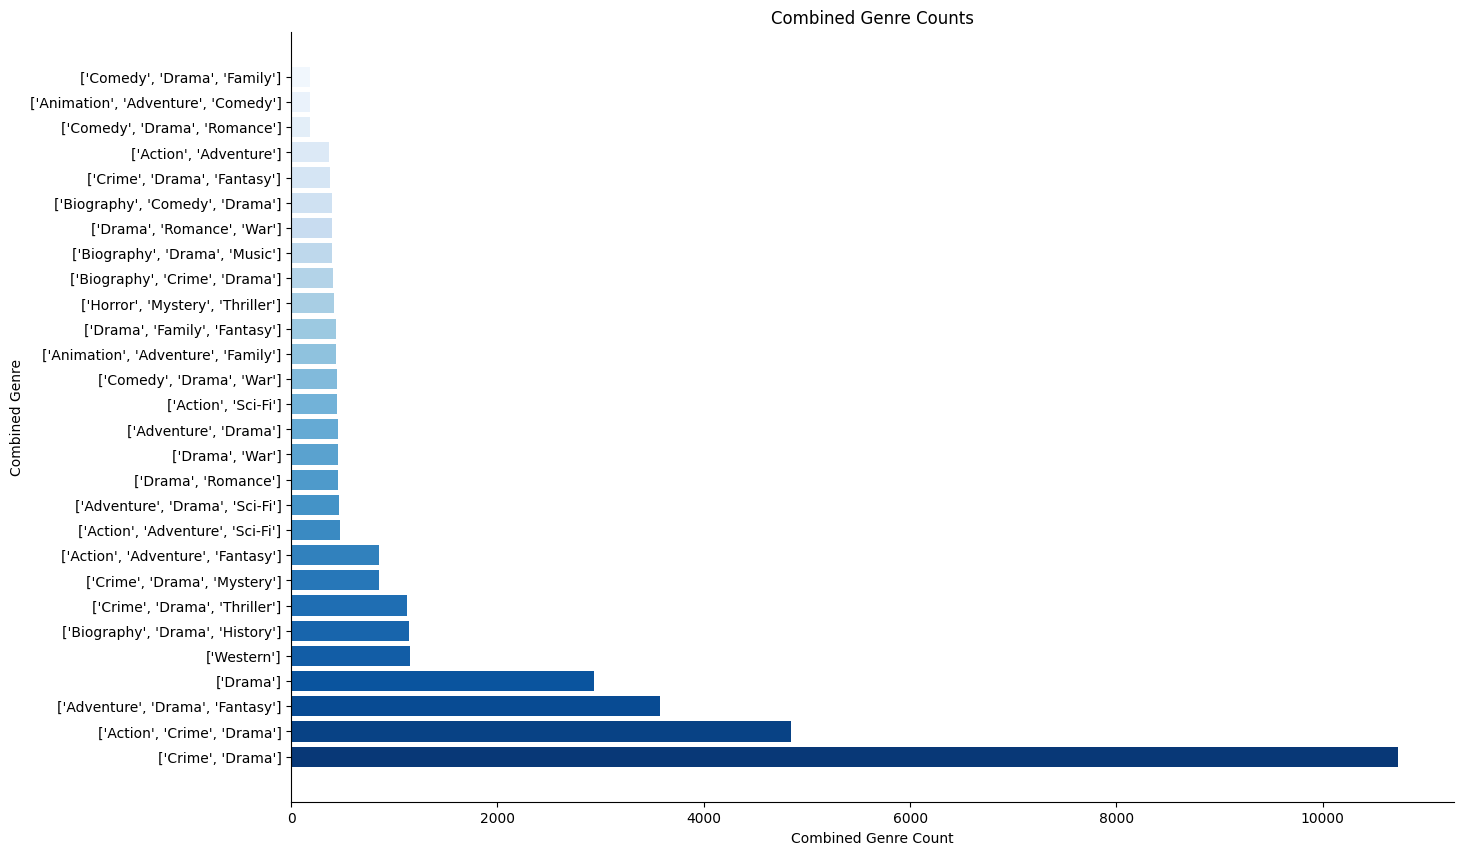

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the combined_genre_stats DataFrame from the previous code

plt.figure(figsize=(15, 10))  # Adjust figure size if needed

# Create the bar plot using combined_count
plt.barh(combined_genre_stats.index, combined_genre_stats['combined_count'],
         color=sns.color_palette("Blues_r", len(combined_genre_stats))) # Change color palette if desired

plt.xlabel("Combined Genre Count")
plt.ylabel("Combined Genre")
plt.title("Combined Genre Counts")

# Remove top and right spines for cleaner look
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

### Most common words for spoilers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

# loading stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

combined_df_exploded['is_spoiler'] = combined_df_exploded['is_spoiler'].astype(bool)

# Filter only spoiler reviews
spoiler_reviews = combined_df_exploded[combined_df_exploded['is_spoiler'] == True]

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

spoiler_reviews['processed_text'] = spoiler_reviews['review_text'].apply(preprocess_text)

all_words = ' '.join(spoiler_reviews['processed_text']).split()

word_counts = Counter(all_words)

most_common_word, most_common_count = word_counts.most_common(1)[0]

print(f"The most common word in spoiler reviews: '{most_common_word}' with frequency {most_common_count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-29-876f83951e91>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spoiler_reviews['processed_text'] = spoiler_reviews['review_text'].apply(preprocess_text)


The most common word in spoiler reviews: 'movie' with frequency 57625


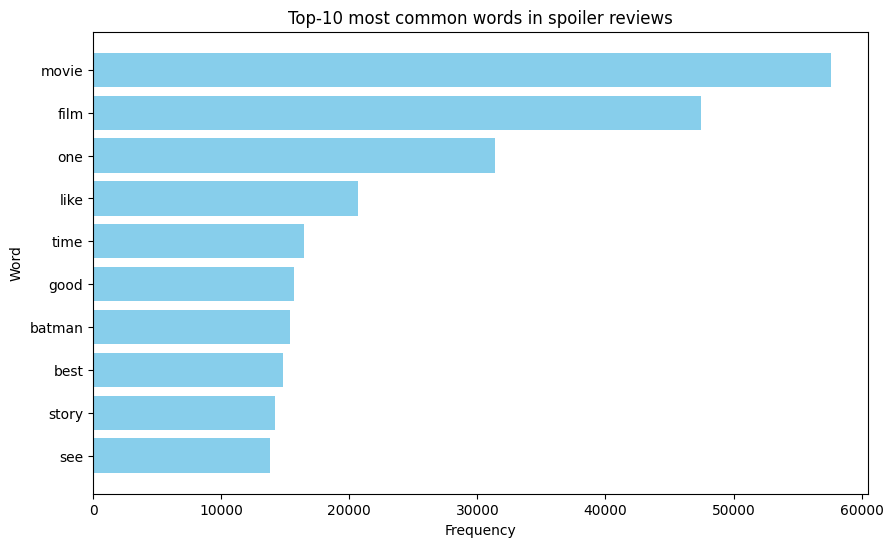

In [ ]:
top_10_words = word_counts.most_common(10)

words, counts = zip(*top_10_words)
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top-10 most common words in spoiler reviews')
plt.gca().invert_yaxis()
plt.show()

### Average length of all reviews and synopsises

In [ ]:
# Функция для подсчета количества слов в тексте
def count_words(text):
    return len(text.split())

combined_df_exploded['review_word_count'] = combined_df_exploded['review_text'].apply(count_words)
avg_review_words = combined_df_exploded['review_word_count'].mean()

# Подсчет среднего количества слов в саммари фильма
combined_df_exploded['synopsis_word_count'] = combined_df_exploded['plot_synopsis'].fillna('').apply(count_words)
avg_synopsis_words = combined_df_exploded['synopsis_word_count'].mean()

print(f"Average words in all the reviews: {avg_review_words:.2f}")
print(f"Average words in all the synopsis: {avg_synopsis_words:.2f}")


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

combined_df_exploded['processed_review'] = combined_df_exploded['review_text'].apply(preprocess_text)
combined_df_exploded['processed_synopsis'] = combined_df_exploded['plot_synopsis'].apply(preprocess_text)

combined_df_exploded['processed_review_count'] = combined_df_exploded['processed_review'].apply(count_words)
avg_proc_review_words = combined_df_exploded['processed_review_count'].mean()

combined_df_exploded['processed_synopsis_count'] = combined_df_exploded['processed_synopsis'].apply(count_words)
avg_proc_synopsis_words = combined_df_exploded['processed_synopsis_count'].mean()

print(f"Average preprocessed words in all the reviews: {avg_proc_review_words:.2f}")
print(f"Average preprocessed words in all the synopsis: {avg_proc_synopsis_words:.2f}")

Average words in all the reviews: 252.41
Average words in all the synopsis: 3036.00
Average preprocessed words in all the reviews: 131.78
Average preprocessed words in all the synopsis: 1634.71


### Average length of spoiler reviews

In [ ]:
combined_df_exploded['is_spoiler'] = combined_df_exploded['is_spoiler'].astype(bool)

spoiler_reviews = combined_df_exploded.loc[combined_df_exploded['is_spoiler'] == True].copy()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

spoiler_reviews['processed_text'] = spoiler_reviews['review_text'].apply(preprocess_text)

spoiler_reviews['word_count'] = spoiler_reviews['processed_text'].apply(count_words)

avg_spoiler_words = spoiler_reviews['word_count'].mean()

print(f"Average preprocessed words in spoiler reviews: {avg_spoiler_words:.2f}")

NameError: name 'count_words' is not defined

### Average number of names in spoilers

In [ ]:
import spacy
import pandas as pd
from tqdm import tqdm  # Shows the progress

nlp = spacy.load("en_core_web_sm")

def count_names_in_texts(texts):
    name_counts = []
    for doc in tqdm(nlp.pipe(texts, batch_size=50, disable=["tagger", "parser"]), total=len(texts)):
        name_counts.append(sum(1 for ent in doc.ents if ent.label_ == "PERSON"))
    return name_counts

combined_df_exploded['is_spoiler'] = combined_df_exploded['is_spoiler'].astype(bool)

spoiler_reviews = combined_df_exploded[combined_df_exploded['is_spoiler']].copy()

# Cutting off long texts
spoiler_reviews['review_text'] = spoiler_reviews['review_text'].astype(str).str[:1000]

spoiler_reviews['name_count'] = count_names_in_texts(spoiler_reviews['review_text'].tolist())

avg_spoiler_names = spoiler_reviews['name_count'].mean()

print(f"Average number of names in spoiler reviews: {avg_spoiler_names:.2f}")


  0%|          | 0/29927 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
 84%|████████▍ | 25150/29927 [09:51<01:52, 42.49it/s]

KeyboardInterrupt



### Comparison between the non-spoler summaries and spoiler review (what makes spoiler a spoiler, BLEU etc.)

## **Classical Machine Learning Algorythms**

### NLTK Clasifier

In [ ]:
import nltk

In [ ]:
def spolier_features(review: str) -> dict[str, float]:
  # Which features can we use to detect the a spoiler?
  # Craft at least one feature and return it as a feature dictionary

#ends_with_unique_female_endings = 1 if any(first_name.endswith(ending) for ending in unique_female_endings) else 0 # for female names
#ends_with_unique_male_endings = 1 if any(first_name.endswith(ending) for ending in unique_male_endings) else 0 # for male names

  return {
      'avg_spoiler_names': avg_spoiler_names,
      'avg_spoiler_words': avg_spoiler_words,
      'name_length': name_length,
      'ends_with_unique_female_endings': ends_with_unique_female_endings,
      'ends_with_unique_male_endings': ends_with_unique_female_endings
      }

In [ ]:
# function check
print(gender_features('Abagael'))
print(gender_features('Aaron'))

In [ ]:
feature_sets = [(gender_features(first_name), gender) for (first_name, gender) in labeled_names]

# We split the dataset to create a previously unseen 'exam' for the model:
train_set, test_set = feature_sets[500:], feature_sets[:500]

# And then, define and train the NLTK classifier
name_classifier = nltk.DecisionTreeClassifier.train(train_set)

In [ ]:
for name in ["Bill", "Melissa", "Barack", "Michelle", "Joe", "Jill", "Donald", "Ivanka"]:
  predicted_gender = name_classifier.classify(gender_features(name))
  print(f"the gender prediction for {name} is {predicted_gender}")

In [ ]:
print(nltk.classify.accuracy(name_classifier, test_set))

In [ ]:
print(name_classifier.pretty_format())

### Decision Tree from Scikit-Learn - code from Liad's homework

In [ ]:
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

In [ ]:
# Maps to convert labels into numerical ids:

label2idx = {'male':0, 'female': 1}
idx2label = {0: 'male', 1: 'female'}

In [ ]:
X = male_names + female_names
y = [label2idx['male']] * len(male_names) + [label2idx['female']] * len(female_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1234, stratify=y)

In [ ]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [ ]:
# Initializing Decision Tree:
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=1234)

In [ ]:
#And of course, we need our Feature Function again.
#However, unlike NLTK, which required a dictionary of features, when working with SKLearn, we need to use a list of numerical features (a vector).

#Here, we just return the last letter of the name as a feature. The python function ord returns the unicode numerical code of the character.

def gender_feature_function(first_name: str) -> list[float]:
  """
  Given a first name, return the features to represent it.

  Args:
    first_name (string): a string representing a first name.

  Returns:
    A list of numerical features
  """
  last_letter_code = ord(first_name[-1])
  return [last_letter_code]
assert gender_feature_function("Željko") == [111] #print(ord('o'))!

In [ ]:
#Now we can use our feature function and convert our data into numerical features:

X_train = list(map(gender_feature_function, X_train))
X_test = list(map(gender_feature_function, X_test))
X_train[:10]
#[[101], [104], [121], [102], [101], [114], [110], [101], [97], [101]]

In [ ]:
#Before using our training data vector for training the model, we often need to convert it from a python list, into a NumPy array. NumPy is an excellent python pacakge for handling mathematical operations with Python.

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape
(5958, 1)
X_train[:10]
array([[101],
       [104],
       [121],
       [102],
       [101],
       [114],
       [110],
       [101],
       [ 97],
       [101]])

In [ ]:
#Let's take a peek and ensure our data is in the way we want it to be:

# zip is a python method to combine (merge) two lists into one
# with it, we can see our features, and the labels, together as a lsit of tuples
print(list(zip(X_train[:5], y_train[:5])))
[(array([101]), 0), (array([104]), 1), (array([121]), 1), (array([102]), 0), (array([101]), 1)]

In [ ]:
# And finally, we are ready to train our model:
clf = clf.fit(X_train, y_train)

In [ ]:
#Visualizing our tree
#We have trained a model, and now we want to understand how this model operates: Which features got more importance, which less, and in which way?

tree.plot_tree(clf, feature_names = ["last_letter"])
plt.show()

In [ ]:
#Now that we have a model, we can evaluate how well we did.
#SKLearn has many different metrics to test our model. For classification tasks, the most common are:
#Precision
#Recall
#F-Score
#Area under curve (AUC)
#Mathew's Correlation Coefficience (MCC)
#But many more exists, and it depends on the task in hand, to decide which one would represent our data set.

#Note: Be careful and don't blindly trust the metrics. Always be judgemental and stay critical about your results and achievements. Here's an excellent video about the topic - and why we should suspect our resutls.

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

In [ ]:
#We can use graphviz to visualize the tree we trained, to understand which features are more important, and therefore have more weight.
#Graphviz creates an image of the tree, which looks something like this:
import graphviz

dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=['last_letter'],
                                class_names=["male", "female"],
                                filled=True,
                                rounded=True,
                               )
graph = graphviz.Source(dot_data)
graph.view()
'Source.gv.pdf'


In [ ]:
#SuperTree
#SuperTree is a newer interactive visualization package that helps us exploring decision trees It's an open source package, and you can find more about it here: https://github.com/mljar/supertree

%pip install supertree --quiet
from supertree import SuperTree
super_tree = SuperTree(clf,
                       X_test,
                       y_test,
                       feature_names=['last_letter'],
                       target_names=["male", "female"])


In [ ]:
# show tree in your notebook
super_tree.show_tree()

### Random Forest

## Naive Bayes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline

%matplotlib inline

In [ ]:
combined_df_exploded['is_spoiler'] = combined_df_exploded['is_spoiler'].astype(int) #change again to 0,1

In [ ]:
combined_df_exploded

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis,genre_string
0,10 February 2006,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,Crime,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...","['Crime', 'Drama']"
0,10 February 2006,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,Drama,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...","['Crime', 'Drama']"
1,6 September 2000,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,Crime,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...","['Crime', 'Drama']"
1,6 September 2000,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,Drama,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...","['Crime', 'Drama']"
2,3 August 2001,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,Crime,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...","['Crime', 'Drama']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34551,10 October 2006,tt0407887,ur12111264,0,"Sorry, thought this was very bad.Terrible stor...",1,Am I the only one?!,"In South Boston, the state police force is wag...",2h 31min,Drama,8.5,2006-10-06,"In voiceover, Irish-American mobster Frank Cos...","['Crime', 'Drama', 'Thriller']"
34551,10 October 2006,tt0407887,ur12111264,0,"Sorry, thought this was very bad.Terrible stor...",1,Am I the only one?!,"In South Boston, the state police force is wag...",2h 31min,Thriller,8.5,2006-10-06,"In voiceover, Irish-American mobster Frank Cos...","['Crime', 'Drama', 'Thriller']"
34552,28 April 2007,tt0407887,ur15166863,0,"I am not a real film buff, and neither is my w...",3,I couldn't believe this film won best picture...,"In South Boston, the state police force is wag...",2h 31min,Crime,8.5,2006-10-06,"In voiceover, Irish-American mobster Frank Cos...","['Crime', 'Drama', 'Thriller']"
34552,28 April 2007,tt0407887,ur15166863,0,"I am not a real film buff, and neither is my w...",3,I couldn't believe this film won best picture...,"In South Boston, the state police force is wag...",2h 31min,Drama,8.5,2006-10-06,"In voiceover, Irish-American mobster Frank Cos...","['Crime', 'Drama', 'Thriller']"


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = combined_df_exploded['review_text']
y = combined_df_exploded['is_spoiler']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1000, train_size= 5000)

In [ ]:
print(X_train)

32827    "Casablanca" (1942) is the golden standard for...
25315    Today I decided to see this film, the work of ...
27353    Directed by Jonathan Demme, based upon the nov...
13813    Actually I had watched this film 13-14 years a...
9970     I LOVE this movie. Its one of my favorite movi...
                               ...                        
5986     The Godfather is one of maybe 3 or 4 of those ...
34356    Tom Selleck turned down the role of Indiana Jo...
25611    I have seen Seven Samurai about 3 times to dat...
24602    And who was the one to directed it : Mr. Scors...
590      It is a movie that must watch before u die it ...
Name: review_text, Length: 5000, dtype: object


In [ ]:
print(y_train)

32827    0
25315    0
27353    0
13813    0
9970     0
        ..
5986     0
34356    0
25611    0
24602    1
590      1
Name: is_spoiler, Length: 5000, dtype: int64


### MultinomialNB

In [ ]:
spoiler_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()), ])

In [ ]:
spoiler_classifier.fit(X_train.values.astype('U'), y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [ ]:
y_preds = spoiler_classifier.predict(X_test.values.astype('U'))

In [ ]:
print(metrics.classification_report(y_test, y_preds, target_names=["Spoiler","Not Spoiler"]))

              precision    recall  f1-score   support

     Spoiler       0.74      1.00      0.85       740
 Not Spoiler       0.00      0.00      0.00       260

    accuracy                           0.74      1000
   macro avg       0.37      0.50      0.43      1000
weighted avg       0.55      0.74      0.63      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(metrics.matthews_corrcoef(y_test, y_preds))

0.0


<Axes: >

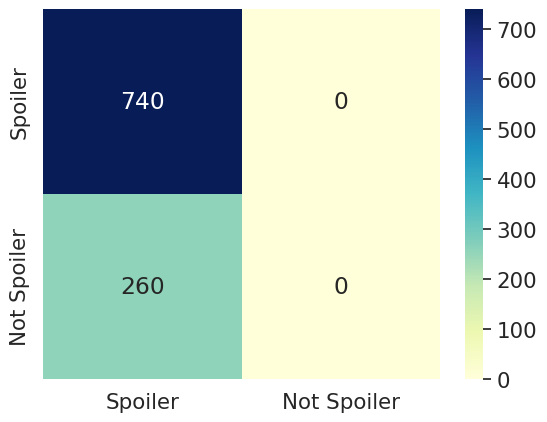

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_preds)
df_cm = pd.DataFrame(conf_mat, ["Spoiler","Not Spoiler"], ["Spoiler","Not Spoiler"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

### MultinomialNB with Smoothing

In [ ]:
spoiler_classifier_smoothed = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB(alpha=1e-10))])

spoiler_classifier_smoothed.fit(X_train.values.astype('U'), y_train)

y_preds = spoiler_classifier_smoothed.predict(X_test.values.astype('U'))

print(metrics.classification_report(y_test, y_preds, target_names=["Spoiler","Not Spoiler"]))

conf_mat = metrics.confusion_matrix(y_test, y_preds)

print(metrics.matthews_corrcoef(y_test, y_preds))

              precision    recall  f1-score   support

     Spoiler       0.77      0.89      0.83       740
 Not Spoiler       0.45      0.26      0.33       260

    accuracy                           0.73      1000
   macro avg       0.61      0.58      0.58      1000
weighted avg       0.69      0.73      0.70      1000

0.18515710067456434


<Axes: >

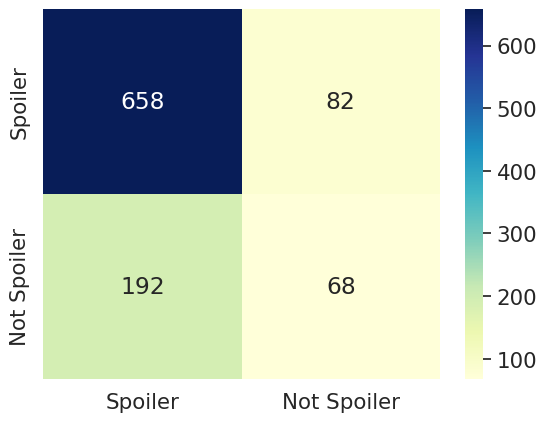

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_preds)
df_cm = pd.DataFrame(conf_mat, ["Spoiler","Not Spoiler"], ["Spoiler","Not Spoiler"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

### ComplementNB

In [ ]:
X2 = combined_df_exploded['review_text']
y2 = combined_df_exploded['is_spoiler']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 1000, train_size= 5000)

spoiler_classifier_complement = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', ComplementNB()), ])

In [ ]:
spoiler_classifier_complement.fit(X2_train.values.astype('U'), y2_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', ComplementNB())])

In [ ]:
y2_preds = spoiler_classifier_complement.predict(X2_test.values.astype('U'))

In [ ]:
print(metrics.classification_report(y2_test, y2_preds, target_names=["Spoiler","Not Spoiler"]))

              precision    recall  f1-score   support

     Spoiler       0.77      1.00      0.87       767
 Not Spoiler       0.50      0.00      0.01       233

    accuracy                           0.77      1000
   macro avg       0.63      0.50      0.44      1000
weighted avg       0.71      0.77      0.67      1000



In [ ]:
print(metrics.matthews_corrcoef(y2_test, y2_preds))

0.028273875809422488


<Axes: >

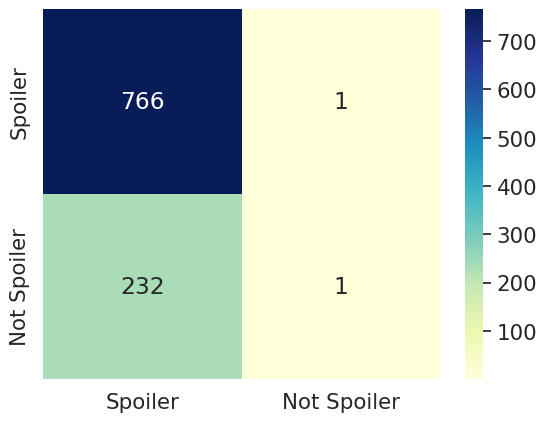

In [ ]:
conf_mat = metrics.confusion_matrix(y2_test, y2_preds)
df_cm = pd.DataFrame(conf_mat, ["Spoiler","Not Spoiler"], ["Spoiler","Not Spoiler"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

### ComplementNB with Smoothing

In [ ]:
spoiler_classifier_complement_smoothed = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', ComplementNB(alpha=1e-10)), ])

spoiler_classifier_complement_smoothed.fit(X2_train.values.astype('U'), y2_train)

y2_preds = spoiler_classifier_complement_smoothed.predict(X2_test.values.astype('U'))

print(metrics.classification_report(y2_test, y2_preds, target_names=["Spoiler","Not Spoiler"]))

conf_mat = metrics.confusion_matrix(y2_test, y2_preds)

print(metrics.matthews_corrcoef(y2_test, y2_preds))

              precision    recall  f1-score   support

     Spoiler       0.81      0.83      0.82       767
 Not Spoiler       0.39      0.35      0.37       233

    accuracy                           0.72      1000
   macro avg       0.60      0.59      0.60      1000
weighted avg       0.71      0.72      0.72      1000

0.19205930785396


<Axes: >

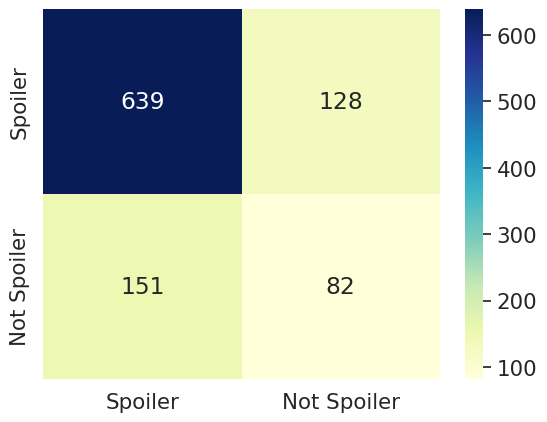

In [ ]:
conf_mat = metrics.confusion_matrix(y2_test, y2_preds)
df_cm = pd.DataFrame(conf_mat, ["Spoiler","Not Spoiler"], ["Spoiler","Not Spoiler"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

improving

## References

*   Dataset:  https://www.kaggle.com/datasets/rmisra/imdb-spoiler-dataset?resource=download&select=IMDB_reviews.json
*   ...
